In [1]:
import data_generator as dg
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

[0. 0. 0.]
[182113.5459279  181717.53381022 182425.92166847]


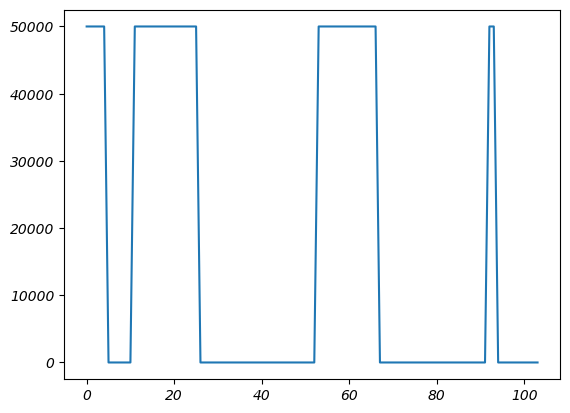

In [2]:
x,c=dg.binary_budget(T=104)
plt.plot(x)
plt.show()

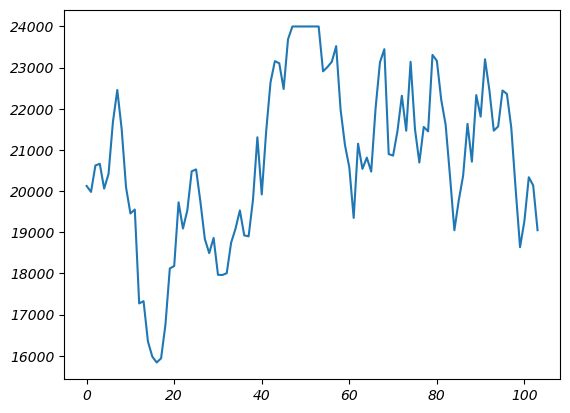

In [3]:
y=dg.mean_reverting_budget(phi=0.9, cap=24000)

plt.plot(y)
plt.show()

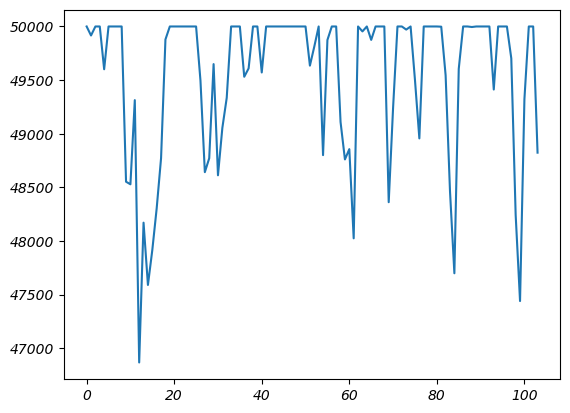

In [4]:
z=dg.mean_reverting_budget(mu=50000,phi=0.5,cap=50000,sigma=1200)

plt.plot(z)
plt.show()

In [40]:
sales=dg.generate_sales_data(x,y,z,betas=[0.005,0.15,0.14,.5], intercept=3,iterations=50,eps=0.01)

[ 1.28106815e-02 -1.62991342e-05 -7.16745030e-03  1.66087562e-03
 -5.36109674e-03  2.11826241e-02  2.98941414e-02 -2.67382280e-03
  7.84363052e-03 -1.16445907e-02 -2.18409086e-02 -1.72056521e-02
  8.35049616e-03  1.20493852e-02  8.07523137e-03 -2.65688128e-03
 -8.19225741e-03  5.45306930e-03  1.96066016e-03 -8.51961885e-03
  1.29064374e-03 -9.44526580e-04  9.41948501e-03  2.30422016e-02
 -3.55111552e-03  1.67254784e-02  1.10338571e-03  5.40084398e-03
  1.06570174e-02 -8.01335246e-03  2.05018655e-02  7.22802104e-03
  1.03156065e-02  2.12368742e-02 -3.28900467e-03  4.87704224e-03
  8.40885687e-05  1.71369375e-02 -5.08322823e-03  4.73750153e-03
 -1.24505680e-02 -1.78451431e-02  5.34381254e-03 -1.10851665e-02
  7.90316582e-03  5.76689943e-03 -6.95069656e-03  1.33080967e-02
  1.03783861e-02 -2.04519941e-03 -4.77798576e-03 -8.75853879e-03
 -6.13667616e-03  8.93330235e-03 -5.89404729e-03  1.03728025e-02
 -2.89662731e-03 -8.29224442e-03  1.36150366e-02  1.90434919e-03
 -7.26155358e-03  1.00714

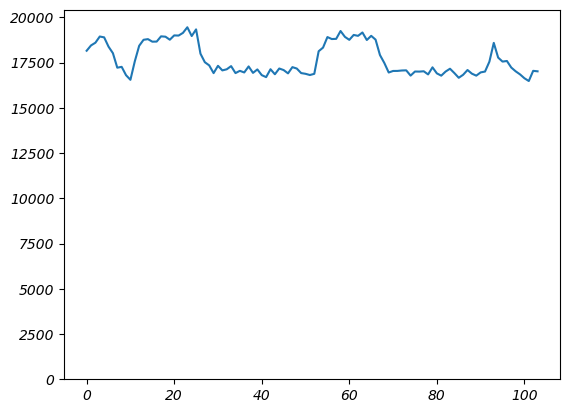

In [41]:
fig, ax = plt.subplots()
ymin, ymax = 0, np.max(sales)
pad = 0.05 * (ymax - ymin if ymax > ymin else 1.0)
ax.set_ylim(0, ymax + pad)
ax.plot(sales)

# Analysing data without trend or seasonality #

In [42]:
shifted_sales=np.roll(np.log1p(sales),1)
shifted_sales[0]=np.nan
X = np.column_stack(np.log1p([x, y, z]))
X=np.column_stack([X,shifted_sales])
X = sm.add_constant(X)  # predictors
y = np.log1p(sales)                 # target

X = sm.add_constant(X)       # intercept
res = sm.OLS(y, X,missing="drop").fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     454.2
Date:                Sun, 01 Feb 2026   Prob (F-statistic):           2.65e-62
Time:                        21:00:43   Log-Likelihood:                 317.85
No. Observations:                 103   AIC:                            -625.7
Df Residuals:                      98   BIC:                            -612.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0509      0.924      3.303      0.0

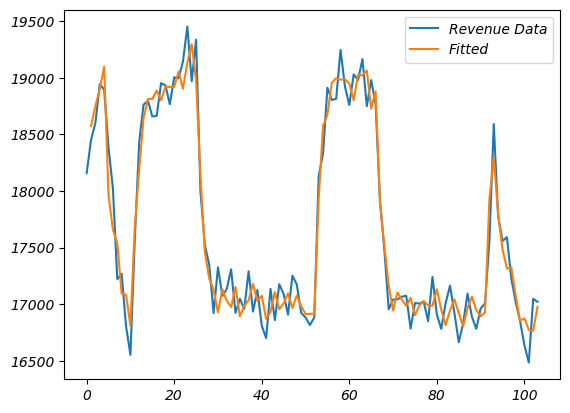

In [43]:
plt.plot(sales)
plt.plot(np.exp(res.predict(X)))
plt.legend(["Revenue Data","Fitted"])
plt.show()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


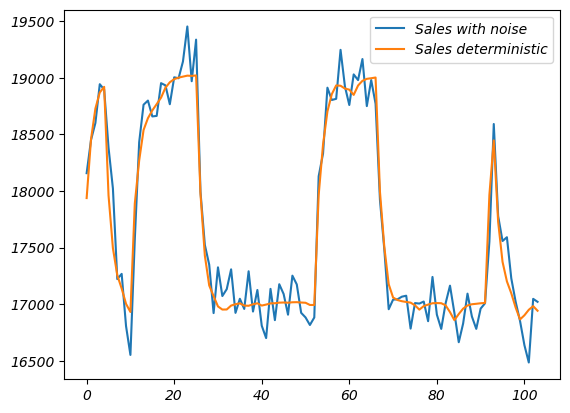

In [44]:
# as_generated is the data without the noise
as_generated=dg.generate_sales_data(x,y,z,betas=[0.005,0.15,0.14,.5], intercept=3,iterations=50,eps=0)
plt.plot(sales)
plt.plot(as_generated)
plt.legend(["Sales with noise","Sales deterministic"])
plt.show()

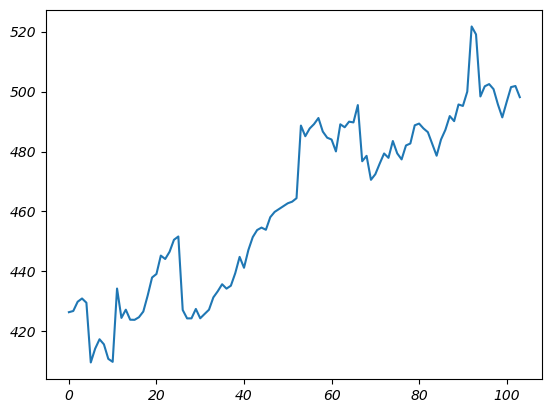

In [7]:
sales2=dg.add_trend(sales,0.25)
plt.plot(sales2)

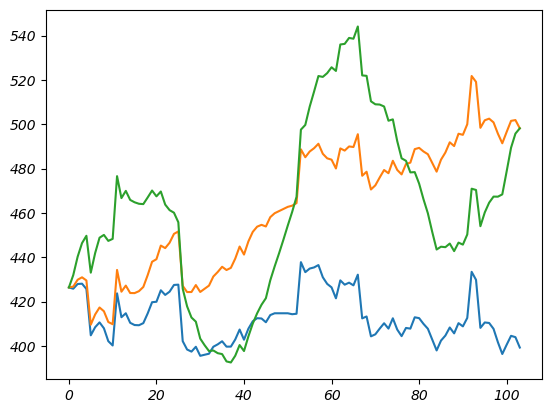

In [8]:
sales3=dg.add_seasonality(sales2,2,0.1)
plt.plot(sales)
plt.plot(sales2)
plt.plot(sales3)
plt.show()

pytensor.tensor.variable.TensorVariable

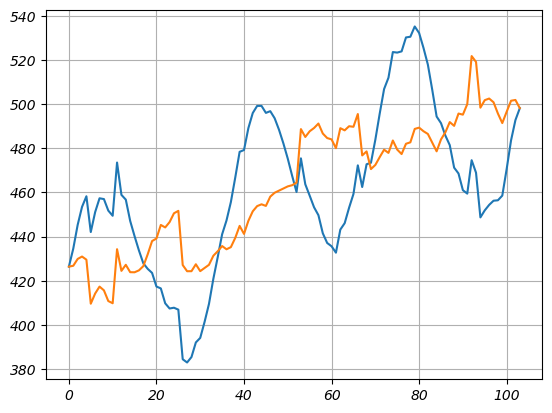

In [9]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 3*2*np.pi, 104)
y = 0.1*np.sin(x)
sales3=sales2*(y+1)


plt.plot(sales3)
plt.plot(sales2)

plt.grid(True)
plt.show()

In [10]:
import pymc as pm
import numpy as np
from pymc_marketing.mmm import GeometricAdstock


x = np.asarray(z, dtype=float) # shape (52,)
adstock = GeometricAdstock(l_max=8) # carryover up to 8 weeks


with pm.Model() as m:
    x_ad = adstock.apply(x) # transformed series (52,)
    beta = pm.Normal("beta", 0, 1)
    mu = pm.Normal("intercept", 0, 1) + beta * x_ad
# ... likelihood for your target y goes here ...

In [11]:
x_ad

Blockwise{Convolve1d, (n),(k),()->(o)}.0

raw spend (first 10):      [1. 2. 3. 4.]
adstocked spend (first 10): [1.    2.2   3.44  4.688]


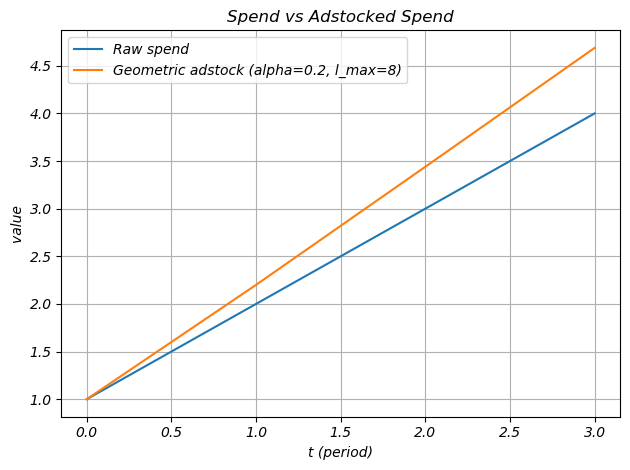

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pytensor
import pytensor.tensor as pt

# Prefer the transformer function (most stable for "just transform an array")
from pymc_marketing.mmm.transformers import geometric_adstock


def adstock_array(x: np.ndarray, alpha: float = 0.5, l_max: int = 13, normalize: bool = False) -> np.ndarray:
    """
    Apply geometric adstock to a 1D numpy array and return a numpy array.

    Parameters
    ----------
    x : np.ndarray
        1D spend series (e.g., length 52).
    alpha : float
        Decay (0..1). Higher => longer carryover.
    l_max : int
        Max lag length.
    normalize : bool
        If True, normalizes the weights to sum to 1 (implementation-dependent behavior).

    Returns
    -------
    np.ndarray
        Adstocked series, same length as x.
    """
    x = np.asarray(x, dtype=float).reshape(-1)

    x_sym = pt.vector("x")  # symbolic placeholder
    y_sym = geometric_adstock(x_sym, alpha=alpha, l_max=l_max, normalize=normalize)

    f = pytensor.function([x_sym], y_sym)  # compile once
    return f(x)  # evaluate -> numpy array


# ---- Example usage ----
spend = np.asarray([1,2,3,4], dtype=float)   # <-- your 52 values here

alpha = 0.2
l_max = 8
spend_ad = adstock_array(spend, alpha=alpha, l_max=l_max, normalize=False)

print("raw spend (first 10):     ", spend[:10])
print("adstocked spend (first 10):", spend_ad[:10])

plt.figure()
plt.plot(spend, label="Raw spend")
plt.plot(spend_ad, label=f"Geometric adstock (alpha={alpha}, l_max={l_max})")
plt.title("Spend vs Adstocked Spend")
plt.xlabel("t (period)")
plt.ylabel("value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
spend_ad


array([1.   , 2.2  , 3.44 , 4.688])

In [23]:
0.2*3.44

0.6880000000000001

4.032